In [1]:
import torch
from torch import nn

import dgl

import cloudpickle

import matplotlib.pyplot as plt
from ipywidgets import interact

from tqdm import trange

import numpy as np
import os

In [2]:
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['font.size'] = 16
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'#'Times New Roman'
#plt.rcParams['font.sans-serif'] = ['Arial'] #['Times New Roman'] #
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.formatter.use_mathtext"] = True

In [3]:
d = '20240122110123'

learning_dir = 'spmNonParam2DFullODE_scale_'+d
simulation_dir = 'spmSimulate_'+d #'spmSimulate_20230713163922' #

device = 'cuda:2'

In [4]:
torch.no_grad()

torch.Size([66000, 3])
torch.Size([66000, 3])
epoch:  6000


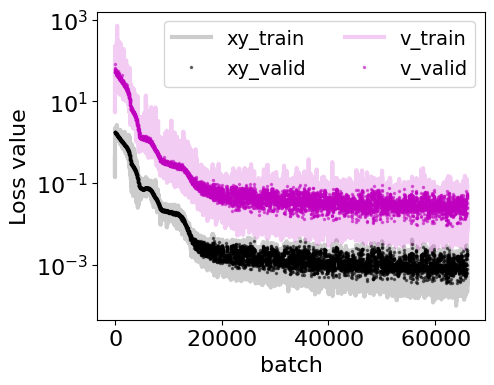

In [5]:
train_loss = torch.load(os.path.join(learning_dir, 'Spring_nonParametric2Dfull_loss_history.pt'))
valid_loss = torch.load(os.path.join(learning_dir, 'Spring_nonParametric2Dfull_validloss_history.pt'))
print(train_loss.shape)
print(valid_loss.shape)

loss_colors = ['k', 'm']#, 'g']
loss_names = ['xy', 'v']#, 'edge']

fig, ax = plt.subplots()
for i, c in enumerate(zip(loss_colors, loss_names)):
    ax.semilogy(train_loss[:,i], c[0]+'-', alpha=0.2, label=c[1]+'_train')
    ax.semilogy(valid_loss[:,i], c[0]+'.', alpha=0.5, label=c[1]+'_valid')
ax.legend(ncols=2, fontsize=14)

ax.set_xlabel('batch')#'epoch')
ax.set_ylabel('Loss value')

print('epoch: ', torch.isfinite(valid_loss[:,0]).sum().item())

fig.savefig(os.path.join(learning_dir, 'loss_history.svg'))
fig.savefig(os.path.join(learning_dir, 'loss_history.png'))

In [6]:
print('train', train_loss)
print('valid', valid_loss[torch.isfinite(valid_loss).any(dim=1)])

train tensor([[3.1073e-01, 6.4647e+00,        nan],
        [2.8882e-01, 5.4183e+00,        nan],
        [4.3696e-01, 6.9931e+00,        nan],
        ...,
        [3.2929e-04, 8.9343e-03,        nan],
        [2.9276e-04, 9.2603e-03,        nan],
        [4.5261e-04, 2.9574e-02,        nan]])
valid tensor([[1.7861e+00, 6.3778e+01,        nan],
        [1.7774e+00, 8.0757e+01,        nan],
        [1.7692e+00, 5.8224e+01,        nan],
        ...,
        [9.7107e-04, 2.5085e-02,        nan],
        [7.6987e-04, 2.5955e-02,        nan],
        [6.2969e-04, 1.8842e-02,        nan]])


In [7]:
with open(os.path.join(simulation_dir, 'Spring_SDE_model.pt'), mode='rb') as f:
    simulation_model = cloudpickle.load(f)
print(simulation_model)

print(simulation_model.state_dict())

print('c : ', simulation_model.dynamicGNDEmodule.calc_module.sp.c())
print('r_c : ', simulation_model.dynamicGNDEmodule.calc_module.sp.r_c())

dynamicGSDEwrapper(
  (dynamicGNDEmodule): dynamicGNDEmodule(
    (calc_module): interactionModule(
      (sp): springPotential()
      (distanceCalc): euclidDistance_nonPeriodic()
    )
    (edgeRefresher): edgeRefresh(
      (edgeConditionModule): radiusgraphEdge(
        (scoreCalcModule): distanceSigmoid()
        (distanceCalc): euclidDistance_nonPeriodic()
        (distance2edge): distance2edge_batched()
      )
      (scorePostProcessModule): pAndLogit2KLdiv()
      (scoreIntegrationModule): scoreListModule()
    )
  )
  (ndataInOutModule): multiVariableNdataInOut()
  (derivativeInOutModule): multiVariableNdataInOut()
  (noiseInOutModule): singleVariableNdataInOut()
)
OrderedDict([('dynamicGNDEmodule.calc_module.gamma', tensor(0.1000)), ('dynamicGNDEmodule.calc_module.sigma', tensor(0.0010)), ('dynamicGNDEmodule.calc_module.sp.logc', tensor(-6.9078, dtype=torch.float64)), ('dynamicGNDEmodule.calc_module.sp.logr_c', tensor(0., dtype=torch.float64))])
c :  tensor(0.0010, dtype=tor

In [8]:
with open(os.path.join(learning_dir, 'Spring_nonParametric2Dfull_learned_model.pt'), mode='rb') as f:
    learned_model = cloudpickle.load(f)
print(learned_model)

print(learned_model.state_dict())

print('c : ', learned_model.dynamicGNDEmodule.calc_module.sp.c())
print('r_c : ', learned_model.dynamicGNDEmodule.calc_module.sp.r_c())

dynamicGSDEwrapper(
  (dynamicGNDEmodule): dynamicGNDEmodule(
    (calc_module): interactionModule_nonParametric_2Dfull(
      (sp): springPotential()
      (distanceCalc): euclidDistance_nonPeriodic()
      (fNN): Sequential(
        (Linear0): Linear(in_features=2, out_features=128, bias=True)
        (ELU0): ELU(alpha=1.0)
        (Linear1): Linear(in_features=128, out_features=128, bias=True)
        (ELU1): ELU(alpha=1.0)
        (Linear2): Linear(in_features=128, out_features=128, bias=True)
        (ELU2): ELU(alpha=1.0)
        (Linear3): Linear(in_features=128, out_features=2, bias=True)
        (Scaling): scalingLayer()
      )
      (f2NN): Sequential(
        (Linear0): Linear(in_features=2, out_features=128, bias=True)
        (ELU0): ELU(alpha=1.0)
        (Linear1): Linear(in_features=128, out_features=128, bias=True)
        (ELU1): ELU(alpha=1.0)
        (Linear2): Linear(in_features=128, out_features=128, bias=True)
        (ELU2): ELU(alpha=1.0)
        (Linear3): Li

In [9]:
L = 5

In [10]:
x = torch.load(os.path.join(simulation_dir, 'Spring_SDE_traj.pt'))
print(x.shape)
print(x)

torch.Size([51, 6, 100, 4])
tensor([[[[ 1.3118e+00,  3.8014e-01,  5.5773e-05,  4.3465e-04],
          [ 4.6308e+00,  3.3150e+00,  5.9344e-04,  8.6578e-04],
          [ 1.6216e+00,  4.0487e+00,  9.1714e-04,  9.0672e-04],
          ...,
          [ 4.6456e+00,  2.2829e+00, -1.8355e-04, -5.2374e-04],
          [ 1.6050e+00,  1.6172e+00,  8.9864e-04,  5.6885e-04],
          [ 2.7594e+00,  3.5140e+00,  5.1919e-05, -7.5285e-04]],

         [[ 3.2048e+00,  4.2541e-01,  2.6845e-04, -8.9110e-04],
          [ 1.5610e+00,  7.1929e-01, -7.1185e-05,  6.4058e-04],
          [ 1.0571e+00,  1.3713e+00, -3.8412e-04, -1.6257e-04],
          ...,
          [ 3.1649e+00,  5.6965e-01, -5.4669e-04,  4.7031e-04],
          [ 4.5086e+00,  3.5623e+00, -9.1944e-05, -1.5532e-04],
          [ 3.8187e+00,  1.7726e+00, -6.8573e-04,  6.0799e-04]],

         [[ 1.6095e+00,  4.6184e+00,  1.2592e-04,  3.9245e-04],
          [ 1.0167e+00,  4.2562e+00,  6.6917e-04,  6.1278e-04],
          [ 4.9365e+00,  1.2766e+00, -9.88

In [11]:
print(x.shape)

torch.Size([51, 6, 100, 4])


In [12]:
t = torch.load(os.path.join(simulation_dir, 'Spring_SDE_t_eval.pt'))
print(t)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50.])


In [13]:
t_min = t.min()
t_max = t.max()

In [14]:
N_batch = x.shape[1]
N_t = x.shape[0]

In [15]:
@interact(n=(0, N_batch-1), t = (0, N_t-1))
def f(n, t):
    fig, ax = plt.subplots()
    ax.plot(x[t, n, :, 0], x[t, n, :, 1], 'o')
    ax.quiver(x[t, n, :, 0], x[t, n, :, 1], x[t, n, :, 2], x[t, n, :, 3])
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    plt.show()

interactive(children=(IntSlider(value=2, description='n', max=5), IntSlider(value=25, description='t', max=50)…

Text(0, 0.5, 'count')

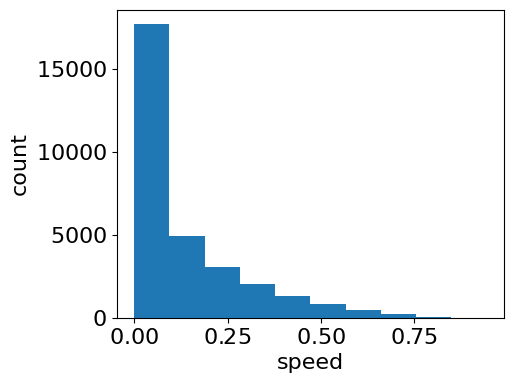

In [16]:
fig, ax = plt.subplots()
ax.hist(torch.norm(x[..., 2:4], dim=-1).reshape([-1]))
ax.set_xlabel('speed')
ax.set_ylabel('count')
#fig.savefig(os.path.join(learning_dir, 'training_speed_hist.svg'))
#fig.savefig(os.path.join(learning_dir, 'training_speed_hist.png'))

In [17]:
def biGraph(xy):
    g = dgl.graph((torch.tensor([], dtype=int), torch.tensor([], dtype=int)), num_nodes=2)
    g.ndata['x'] = torch.stack((torch.zeros_like(xy), xy), dim=0)
    return g

In [18]:
x_lim = 5

N_full = 100

test_x = torch.linspace(-x_lim, x_lim, N_full)
test_xy = torch.cartesian_prod(test_x, test_x)

test_graph_true = dgl.batch(list(map(biGraph, test_xy)))
test_graph_pred = dgl.batch(list(map(biGraph, test_xy)))


simulation_model.deleteGraph()
simulation_model.dynamicGNDEmodule.edgeRefresher.edgeConditionModule(test_graph_pred)
learned_model.deleteGraph()
learned_model.dynamicGNDEmodule.edgeRefresher.edgeConditionModule(test_graph_pred)

test_graph_true = simulation_model.dynamicGNDEmodule.edgeRefresher.createEdge(test_graph_true)
test_graph_pred = learned_model.dynamicGNDEmodule.edgeRefresher.createEdge(test_graph_pred)


In [19]:
test_graph_true.update_all(simulation_model.dynamicGNDEmodule.calc_module.calc_message, dgl.function.sum('m', 'f_true'))
test_graph_pred.update_all(learned_model.dynamicGNDEmodule.calc_module.calc_message, dgl.function.sum('m', 'f_pred'))

In [20]:
print(test_graph_true.ndata)

{'x': tensor([[ 0.0000,  0.0000],
        [-5.0000, -5.0000],
        [ 0.0000,  0.0000],
        ...,
        [ 5.0000,  4.8990],
        [ 0.0000,  0.0000],
        [ 5.0000,  5.0000]]), 'f_true': tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<GSpMMBackward>)}


In [21]:
def true_force_in_graph(g):
    simulation_model.deleteGraph()
    simulation_model.dynamicGNDEmodule.edgeRefresher.edgeConditionModule(g)
    g = simulation_model.dynamicGNDEmodule.edgeRefresher.createEdge(g)
    g.update_all(simulation_model.dynamicGNDEmodule.calc_module.calc_message, dgl.function.sum('m', 'f_true'))
    return g.ndata['f_true'].detach().reshape(-1, 2)

In [22]:
test_xy_2D = test_graph_true.ndata['x'][1::2].detach().reshape(N_full, N_full, 2)

true_force = test_graph_true.ndata['f_true'][0::2].detach().reshape(N_full, N_full, 2)

pred_force = test_graph_pred.ndata['f_pred'][0::2].detach().reshape(N_full, N_full, 2)

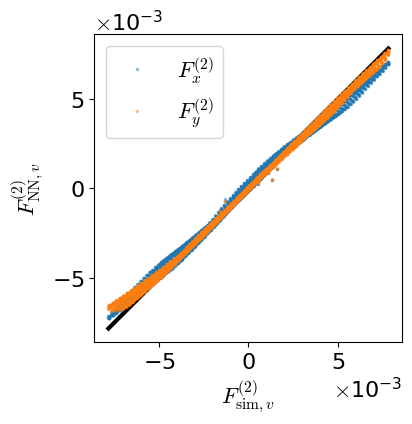

In [25]:
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*true_force.max().item(), np.array([-1, 1])*true_force.max().item(), 'k-')
p=ax.plot(true_force.cpu().numpy().reshape([-1,2]), pred_force.cpu().numpy().reshape([-1,2]), '.', alpha=0.4, rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(2)}_{{\rm sim}, v}$')
ax.set_ylabel(r'$F^{(2)}_{{\rm NN}, v}$')
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.legend(p,[r'$F^{(2)}_{x}$', r'$F^{(2)}_{y}$'])
fig.savefig(os.path.join(learning_dir, 'interaction_force_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'interaction_force_predVStrue.png'))

In [38]:
def add_v(g, v):
    g.ndata['v'] = torch.stack((v, torch.zeros_like(v)), dim=1).reshape([-1, v.shape[-1]])
    return g

In [39]:
v_lim = 1.5

test_v = torch.linspace(-v_lim, v_lim, N_full)
test_uv = torch.cartesian_prod(test_v, test_v)

test_graph_true = add_v(test_graph_true, test_uv)
test_graph_pred = add_v(test_graph_pred, test_uv)

In [40]:
test_graph_true.apply_nodes(lambda nodes: {'f2_true': -simulation_model.dynamicGNDEmodule.calc_module.gamma * nodes.data['v']})
test_graph_pred.apply_nodes(lambda nodes: {'f2_pred': learned_model.dynamicGNDEmodule.calc_module.f2NN(nodes.data['v'])})

In [41]:
test_uv_2D = test_graph_true.ndata['v'][0::2].detach().reshape(N_full, N_full, 2)

true_force2 = test_graph_true.ndata['f2_true'][0::2].detach().reshape(N_full, N_full, 2)

pred_force2 = test_graph_pred.ndata['f2_pred'][0::2].detach().reshape(N_full, N_full, 2)

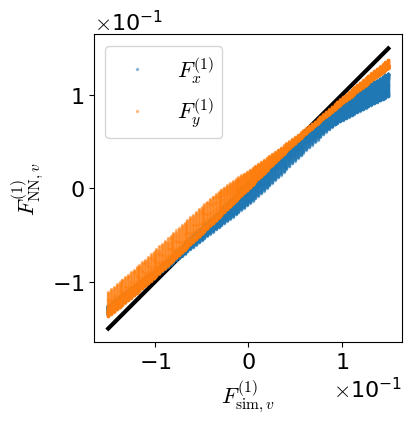

In [53]:
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*true_force2.max().item(), np.array([-1, 1])*true_force2.max().item(), 'k-')
p=ax.plot(true_force2.cpu().numpy().reshape([-1,2]), pred_force2.cpu().numpy().reshape([-1,2]), '.', alpha=0.4, rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(1)}_{{\rm sim}, v}$')
ax.set_ylabel(r'$F^{(1)}_{{\rm NN}, v}$')
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.legend(p,[r'$F^{(1)}_{x}$', r'$F^{(1)}_{y}$'])
#ax.set_xlim([-2e-2, 3e-2])
#ax.set_ylim([-2e-2, 3e-2])
fig.savefig(os.path.join(learning_dir, 'friction_force_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'friction_force_predVStrue.png'))